**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - Data Checkpoint

# Names

- Ant Man
- Hulk
- Iron Man
- Thor
- Wasp

# Research Question

-  Include a specific, clear data science question.
-  Make sure what you're measuring (variables) to answer the question is clear

What is your research question? Include the specific question you're setting out to answer. This question should be specific, answerable with data, and clear. A general question with specific subquestions is permitted. (1-2 sentences)



## Background and Prior Work


- Include a general introduction to your topic                       <---- I dont think we did this well enough on the proposal.
- Include explanation of what work has been done previously
- Include citations or links to previous work

This section will present the background and context of your topic and question in a few paragraphs. Include a general introduction to your topic and then describe what information you currently know about the topic after doing your initial research. Include references to other projects who have asked similar questions or approached similar problems. Explain what others have learned in their projects.

Find some relevant prior work, and reference those sources, summarizing what each did and what they learned. Even if you think you have a totally novel question, find the most similar prior work that you can and discuss how it relates to your project.

References can be research publications, but they need not be. Blogs, GitHub repositories, company websites, etc., are all viable references if they are relevant to your project. It must be clear which information comes from which references. (2-3 paragraphs, including at least 2 references)

 **Use inline citation through HTML footnotes to specify which references support which statements** 

From the Amazon Product Pricing Report 2024 on Issuu<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1), we can see that Amazon prices are influenced by a vast amount of factors such as supply and demand, seasonal trends, competition, shifting seller fees, algorithmic pricing, Amazon's buy box system. Other elements such as brand power, customer reviews, and holiday shopping behavior also contribute to pricing variability. This report serves as essential information for this project as it provides context to better interpret and analyze Amazon price trends. The report provides information on different pricing trends across different sectors of the market such as beauty, home and kitchen, arts and crafts, pet supply, and baby products, and demonstrates how each sector faces different trends. With each market sector, the report also produces concise and clear visualizations of pricing data across multiple Amazon products.

The Consumer Price Index (CPI) Summary from the US Bureau of Labor Statistics<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) offers guidance as to how to structure and analyze data related to our topic. Their report on CPI changes from 2023-2024 exemplifies how to organize large datasets and distill them into clear, actionable insights. The summary’s consistent formatting and emphasis on year-over-year percentage changes allow for a straightforward understanding of trends in consumer prices across different sectors. The structured approach will be instrumental in our own analysis of pricing data, helping us standardize our methodology and avoid potential misinterpretations. By adopting their organizational strategy, we can enhance the accuracy and credibility of our findings.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Jungle Scout (2024, Jan). Amazon Product Pricing Report 2024. Issuu. https://issuu.com/junglescoutcobalt/docs/jungle-scout-amazon-product-pricing-report-2024?utm_source=chatgpt.html 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Bureau of Labor Statistics (2024, Feb). Consumer Price Index Summary. U.S. Department of Labor. https://www.bls.gov/news.release/pdf/cpi.html

# Hypothesis



- Include your team's hypothesis
- Ensure that this hypothesis is clear to readers
- Explain why you think this will be the outcome (what was your thinking?)

What is your main hypothesis/predictions about what the answer to your question is? Briefly explain your thinking. (2-3 sentences)

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- Dataset #2 (if you have more than one!)
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- etc

Now write 2 - 5 sentences describing each dataset here. Include a short description of the important variables in the dataset; what the metrics and datatypes are, what concepts they may be proxies for. Include information about how you would need to wrangle/clean/preprocess the dataset

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.

In [3]:
# Install the keepa library (run this cell if not already installed)
!pip install keepa


To query the price of a given amazon product, there are many different types of the the 'price' variable we can access. Two of them are new price and listing price. Here are the differences:

• NEW PRICE:
This is the current selling price for an item offered on Amazon in brand new condition. It reflects the actual market price that customers pay—typically the lowest available offer among Amazon and third‑party sellers. Because it’s influenced by promotions, competition, and real‑time market conditions, the NEW price can fluctuate over time.

• LISTING PRICE:
This is usually the manufacturer’s suggested retail price (MSRP) or the original price displayed on the product’s listing. It tends to be more stable and is often used as a reference to show discounts or price reductions. Even when the new price drops (for deals or competitive reasons), the listing price may remain unchanged.

The new price shows you what you’d pay right now, while the listing price is a reference value set by the manufacturer. This difference helps sellers and buyers gauge the discount depth and market dynamics.

Since we want to accurately capture the price a consumer is paying at a given time, we will use the NEW PRICE.

Other price variables we can access are the NEW_FBM (Filled by Manufacturer), NEW_FBA (Filled by Amazon), USED, (used items), REFURBISHED (refurbished items), WAREHOUSE (prices from amazon warhouse deals, usually returned items). These price variables offer spotty data coverage, and don't accurately represent the consumer experience, so we will not be using them.  

## Dataset #1 (use name instead of number here)

100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


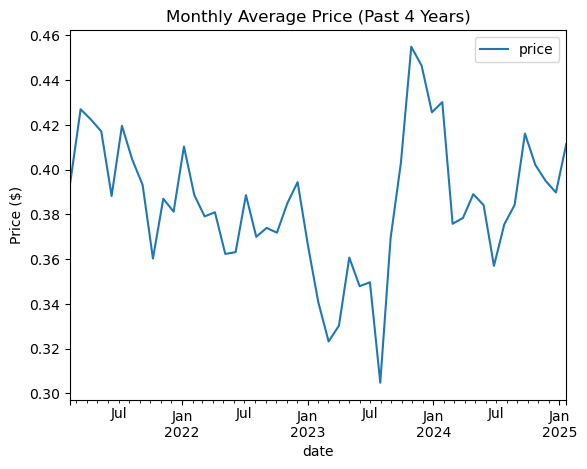

In [ ]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 


#Current code for querying price history of 1 product from Amazon using Keepa API.

import keepa
import datetime
import pandas as pd
import matplotlib.pyplot as plt

access_key = "df2mtauj1tmrngcm95ubshd41fplpf2bfh1nba8s8hpd2m6golbbrj9bat7osb8o" # do no share outside of private repo!!
api = keepa.Keepa(access_key)

# Choose an ASIN to query. Lists also work.
#TODO: Find a way to query large amounts of asins at a time, possibly by passing in a file.
asin = "B0088PUEPK"

# Query product history for the past 4 years (1460 days)
# The 'days' parameter limits the returned historical data to the last X days.
products = api.query(asin, days=1460)
product = products[0]

# Access the price history for Amazon's NEW price.
# The returned arrays are in "Keepa time" (minutes since an offset).
# There are multiple different columns 
price_history = product['data']['NEW']
time_history  = product['data']['NEW_time']                 

# LIST PRICE data, probably wont use
#listprice_history = product['data']['LISTPRICE']
#listprice_times = product['data']['LISTPRICE_time']

# Convert Keepa time to datetime.
# According to Keepa docs, to convert Keepa time (in minutes) to a Unix timestamp in seconds:
#    timestamp = (keepaTime + 21564000) * 60
def keepa_time_to_datetime(kt):
    if isinstance(kt, int):
        return datetime.datetime.fromtimestamp((kt + 21564000) * 60)
    else:
        # If it's already a datetime, just return it
        return kt

dates = [keepa_time_to_datetime(t) for t in time_history]

# Convert price from cents to dollars (assuming US market)
#TODO: Fix price units
prices = [p / 100.0 for p in price_history]

# Create a DataFrame from price data
df = pd.DataFrame({'date': dates, 'price': prices})
df.set_index('Date', inplace=True)

# Resample the data to get the average price for every 30-day period
monthly_avg = df.resample('30D').mean()

# Plot the monthly average price over the past 4 years
monthly_avg.plot(title="Monthly Average Price (Past 4 Years)")
plt.ylabel("Price ($)")
plt.show()


Note:
The code of the cell above is mostly generated by ChatGPT from the prompt "How can I load the Keepa API into an ipynb, and query price data every 30 days for the past 4 years?"

## Dataset #2 (if you have more than one, use name instead of number here)

In [ ]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Team Expectations 


Read over the [COGS108 Team Policies](https://github.com/COGS108/Projects/blob/master/COGS108_TeamPolicies.md) individually. Then, include your group’s expectations of one another for successful completion of your COGS108 project below. Discuss and agree on what all of your expectations are. Discuss how your team will communicate throughout the quarter and consider how you will communicate respectfully should conflicts arise. By including each member’s name above and by adding their name to the submission, you are indicating that you have read the COGS108 Team Policies, accept your team’s expectations below, and have every intention to fulfill them. These expectations are for your team’s use and benefit — they won’t be graded for their details.

* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data (Ant Man); EDA (Hulk) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin Analysis (Iron Man; Thor) | Discuss/edit Analysis; Complete project check-in |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 3/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |